In [9]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# Prepare and load data Train

In [10]:
X_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/train/Covid/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 0)

for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/train/Normal/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 1)


for img in glob.glob(r"/content/drive/MyDrive/datasets2/Covid19-dataset/train/Viral Pneumonia/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 2)

# Prepare and load data Test

In [15]:
X_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Covid/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Normal/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Viral Pneumonia/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 2)

In [16]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D



# Prepare the model

In [79]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [80]:
model.summary() 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 6, 6, 128)      

# train the  model

In [81]:
history = model.fit( X_train, y_train, epochs = 40, verbose=1 ,  validation_split=0.25  )

Epoch 1/40
5/5 [==============================] - 1s 99ms/step - loss: 1.0188 - accuracy: 0.4820 - val_loss: 1.5519 - val_accuracy: 0.0000e+00
Epoch 2/40
5/5 [==============================] - 0s 12ms/step - loss: 0.9092 - accuracy: 0.5396 - val_loss: 1.8485 - val_accuracy: 0.0000e+00
Epoch 3/40
5/5 [==============================] - 0s 12ms/step - loss: 0.7478 - accuracy: 0.7770 - val_loss: 0.6235 - val_accuracy: 0.9362
Epoch 4/40
5/5 [==============================] - 0s 12ms/step - loss: 0.7234 - accuracy: 0.7194 - val_loss: 0.8168 - val_accuracy: 0.6170
Epoch 5/40
5/5 [==============================] - 0s 11ms/step - loss: 0.4311 - accuracy: 0.8273 - val_loss: 1.0120 - val_accuracy: 0.4255
Epoch 6/40
5/5 [==============================] - 0s 12ms/step - loss: 0.2644 - accuracy: 0.9065 - val_loss: 0.2359 - val_accuracy: 0.9149
Epoch 7/40
5/5 [==============================] - 0s 13ms/step - loss: 0.3228 - accuracy: 0.8849 - val_loss: 0.2580 - val_accuracy: 0.8723
Epoch 8/40
5/5 [===

# plot the loss and the accuracy per epochs lineplot

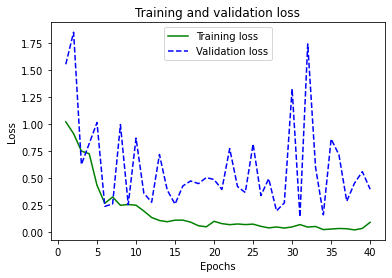

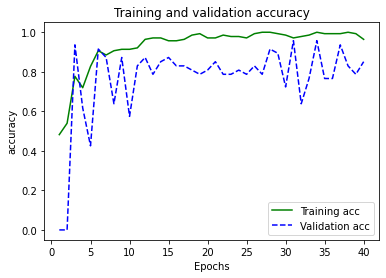

In [82]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='green', label='Training loss')
plt.plot(epochs, val_loss, color='blue', linestyle='dashed', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, acc, color='green', label='Training acc')
plt.plot(epochs, val_acc, color='blue', linestyle='dashed', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()


# train & test loss and accuracy

In [83]:
score = model.evaluate(X_train , y_train, verbose=0)

print('Train loss:', score[0])
print('Train accuracy: ', score[1]*100.0 ,'%')

Train loss: 0.10996571183204651
Train accuracy:  96.23655676841736 %


In [84]:
score = model.evaluate(X_test , y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy: ', score[1]*100.0 ,'%')

Test loss: 0.33685335516929626
Test accuracy:  86.53846383094788 %
